In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pl
%matplotlib inline
import numpy as np

In [4]:
path = 'result/'
res_adult = pd.read_csv(path + 'resultado_adult.csv')
res_adult.drop('Unnamed: 0', axis=1, inplace=True)
res_compas = pd.read_csv(path + 'resultado_compas.csv')
res_compas.drop('Unnamed: 0', axis=1, inplace=True)
res_german = pd.read_csv(path + 'resultado_german.csv')
res_german.drop('Unnamed: 0', axis=1, inplace=True)
res_default = pd.read_csv(path + 'resultado_default.csv')
res_default.drop('Unnamed: 0', axis=1, inplace=True)

In [3]:
res_compas['dataset'] = 'compas'
res_german['dataset'] = 'german'
res_default['dataset'] = 'default'

In [5]:
res_completo = res_adult.append(res_compas).append(res_german).append(res_default)
res_completo

,name_exp,feat_imp,shap_rank,mean_unpriv,mean_priv,priv_greater_unpriv,dataset,acc_test,1_disp_impact_bin,mean_difference,1_disp_impact_clf,avg_odds,equal_opport,false_discovery_rate,entropy_index,consistency
0,rf_transf,0.004346,25,0.008077,-0.001521,0,adult,0.843484,0.419783,-0.094064,0.419783,-0.047351,-0.058014,0.035503,0.083505,0.881523
1,rf_orig,0.004276,24,0.008153,-0.001554,0,adult,0.843792,0.391354,-0.087600,0.391354,-0.036585,-0.041082,0.047609,0.083244,0.884983
2,lr_transf,0.055355,27,0.189043,-0.032006,0,adult,0.851162,0.173878,-0.035661,0.173878,0.057766,0.116239,0.089234,0.080638,0.935817
3,lr_orig,0.088364,17,-0.302515,0.051159,1,adult,0.852083,0.425055,-0.091517,0.425055,-0.041442,-0.048858,0.018721,0.079902,0.939953
0,rf_transf,0.027644,4,-0.003539,0.007485,1,adult,0.621490,0.184631,-0.108448,0.184631,-0.080918,-0.086583,0.091454,0.197665,0.765767
1,rf_orig,0.026029,5,0.000383,0.003755,1,adult,0.617711,0.222003,-0.134351,0.222003,-0.115880,-0.070144,0.043080,0.199433,0.770410
2,lr_transf,0.119486,4,0.091106,-0.176032,0,adult,0.656587,-0.000330,0.000207,-0.000330,0.032952,0.042058,0.101004,0.140874,0.905616
3,lr_orig,0.039066,11,-0.030004,0.057159,1,adult,0.665767,0.218033,-0.160879,0.218033,-0.131754,-0.097775,0.056130,0.136133,0.955832
0,rf_transf,0.011002,13,0.020982,-0.007989,0,adult,0.753333,0.178488,-0.142348,0.178488,-0.065558,-0.092655,0.187074,0.102995,0.784000
1,rf_orig,0.005075,32,0.006105,-0.001907,0,adult,0.760000,0.144120,-0.116130,0.144120,-0.036684,-0.070621,0.195513,0.096743,0.792667


In [6]:
res_completo['data'] = res_completo['name_exp'].apply(lambda row: row.split('_')[-1])
res_completo['model'] = res_completo['name_exp'].apply(lambda row: row.split('_')[0])
res_completo['new_name'] = res_completo.apply(lambda row: row['dataset'] + '_' +
                                              row['name_exp'].split('_')[0], axis=1)
res_completo['mean_dif'] = res_completo.apply(lambda row: row['mean_unpriv'] - 
                                              row['mean_priv'], axis=1)
res_completo['disp_impact_bin'] = 1 - res_completo['1_disp_impact_bin']

In [8]:
def remove_axis_rigth(ax):
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.spines["bottom"].set_visible(False)
    
def remove_axis_left(ax):
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.spines["bottom"].set_visible(False)

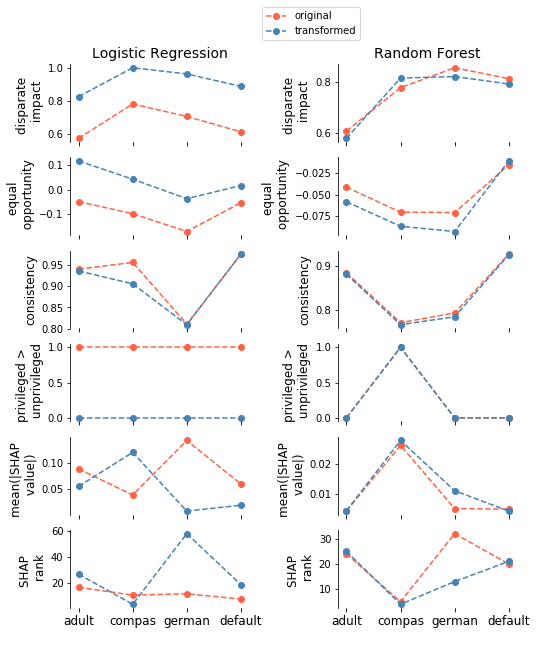

In [10]:
x = list(range(4))
my_xticks = ['adult', 'compas', 'german', 'default']

df_orig_lr = res_completo[(res_completo['data'] == 'orig') & 
                          (res_completo['model'] == 'lr')]
df_transf_lr = res_completo[(res_completo['data'] == 'transf') & 
                            (res_completo['model'] == 'lr')]
df_orig_rf = res_completo[(res_completo['data'] == 'orig') & 
                          (res_completo['model'] == 'rf')]
df_transf_rf = res_completo[(res_completo['data'] == 'transf') & 
                            (res_completo['model'] == 'rf')]
name2title = {'acc_test': 'accuracy',
              'disp_impact_bin': 'disparate \n impact',              
              'equal_opport': 'equal \n opportunity',
              'entropy_index': 'gen. entropy index',
              'feat_imp': 'mean(|SHAP  \n value|)',
              'mean_dif': 'difference feature value',
              'shap_rank': 'SHAP \n rank',
              'mean_difference': 'mean_difference',
             'false_discovery_rate': 'false_discovery_rate',
             'priv_greater_unpriv': 'privileged > \n unprivileged',
             'acc_test': 'acc_test',
             'consistency': 'consistency'}
fig, axes = pl.subplots(nrows=6, ncols=2, figsize=(8, 10), sharex=True)#, sharey=True)
fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.5, hspace=None)

columns = ['disp_impact_bin', 'equal_opport', 'consistency', 'priv_greater_unpriv', 'feat_imp', 'shap_rank']
for i, col in enumerate(columns):
    df_orig_lr.plot(x='new_name', y=col, color='tomato', style='--o', ax=axes[i,0], 
                 legend=False, grid=False)
    df_transf_lr.plot(x='new_name', y=col, color='steelblue', style='--o', ax=axes[i,0],
                   legend=False, grid=False)
    axes[i,0].set_ylabel(name2title[col], fontsize=12)
    axes[i,0].set_facecolor('xkcd:white')
    remove_axis_rigth(axes[i,0])
        
for i, col in enumerate(columns):
    df_orig_rf.plot(x='new_name', y=col, color='tomato', style='--o', ax=axes[i,1], 
                 legend=False, grid=False)
    df_transf_rf.plot(x='new_name', y=col, color='steelblue', style='--o', ax=axes[i,1],
                   legend=False, grid=False)
    axes[i,1].set_ylabel(name2title[col], fontsize=12)
    axes[i,1].set_facecolor('xkcd:white')
    remove_axis_left(axes[i,1])

axes[0,0].set_title('Logistic Regression', fontsize=14)
axes[0,1].set_title('Random Forest', fontsize=14)
pl.xlabel(' ')
axes[5,0].set_xlabel(' ')
pl.xticks(x, my_xticks, fontsize=12)
pl.legend(['original', 'transformed'], bbox_to_anchor=(0.15,7.8))
fig.patch.set_facecolor('w')
axes[5,0].tick_params(axis='x', which='major', labelsize=12)

pl.savefig(path+'res_final.png')